In [ ]:
!gdown --id 1Z4H2Ol4OHAbqnMWRvnEwVv7TAgJ1RYgM
!gdown 1HjiB9sqKN-rNRANLTmdgU7Hb0r7YGwTu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Z4H2Ol4OHAbqnMWRvnEwVv7TAgJ1RYgM
From (redirected): https://drive.google.com/uc?id=1Z4H2Ol4OHAbqnMWRvnEwVv7TAgJ1RYgM&confirm=t&uuid=22a8fddd-3c5a-45ea-a062-3e1ee13064db
To: /content/ISIC-2017_Training_Data.zip
100% 6.23G/6.23G [01:24<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HjiB9sqKN-rNRANLTmdgU7Hb0r7YGwTu
To: /content/ISIC-2017_Training_Part1_GroundTruth.zip
100% 9.32M/9.32M [00:00<00:00, 25.3MB/s]


In [ ]:
!unzip ISIC-2017_Training_Data.zip
!unzip ISIC-2017_Training_Part1_GroundTruth.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ISIC-2017_Training_Data/ISIC_0002948.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0002948_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0002975.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0002975_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0002976.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0002976_superpixels.png  
 extracting: ISIC-2017_Training_Data/ISIC_0003005.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0003005_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0003051.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0003051_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0003056.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0003056_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0003174.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0003174_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0003308.jpg  
  inflating: ISIC-2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
from PIL import Image
import seaborn as sns

image_folder = "ISIC-2017_Training_Data"
mask_folder = "ISIC-2017_Training_Part1_GroundTruth"

In [ ]:
image_paths = sorted(glob(os.path.join(image_folder, "ISIC_*.jpg")))
mask_paths = sorted(glob(os.path.join(mask_folder, "ISIC_*_segmentation.png")))

# Kiểm tra số lượng hình ảnh và mặt nạ
print(f"Number of images: {len(image_paths)}")
print(f"Number of masks: {len(mask_paths)}")

Number of images: 2000
Number of masks: 2000


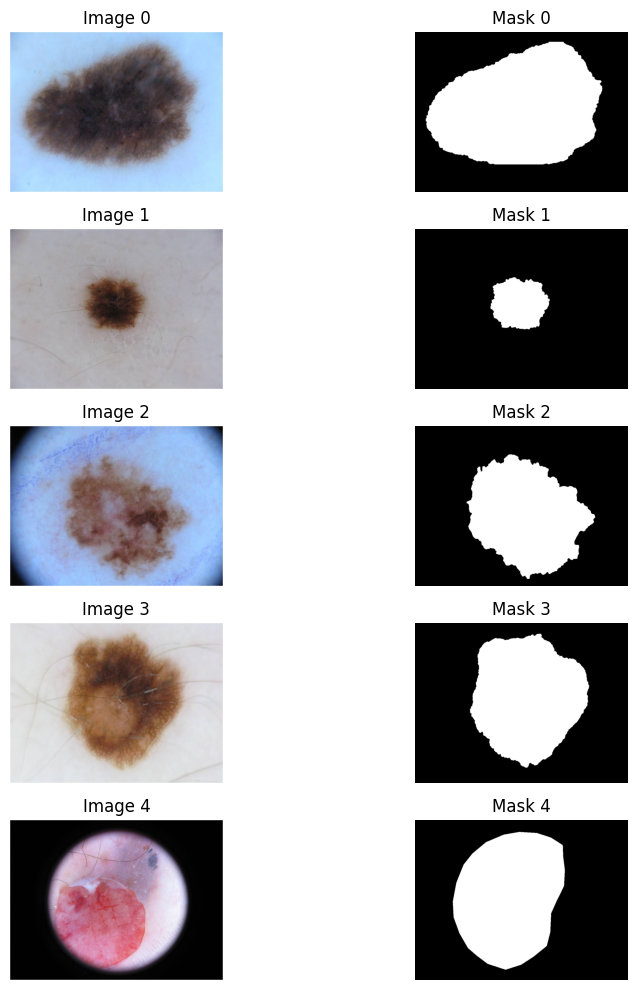

In [ ]:
def plot_images_masks(images, masks, num_samples=5):
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 10))

    for i in range(num_samples):
        img = Image.open(images[i])
        mask = Image.open(masks[i])

        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Image {i}")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask, cmap="gray")
        axes[i, 1].set_title(f"Mask {i}")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

plot_images_masks(image_paths, mask_paths)

In [ ]:
def check_image_shapes(image_paths):
    shapes = [Image.open(img).size for img in image_paths]
    unique_shapes = set(shapes)

    print(f"Unique image sizes: {unique_shapes}")

check_image_shapes(image_paths)

Unique image sizes: {(6601, 4401), (6661, 4461), (6668, 4439), (3024, 2016), (6641, 4400), (6642, 4420), (6640, 4441), (6602, 4402), (2313, 1985), (576, 768), (949, 626), (2101, 1943), (6607, 4419), (833, 680), (6648, 4399), (3008, 2000), (6642, 4422), (6608, 4399), (961, 649), (6642, 4440), (6668, 4459), (2597, 2185), (1456, 1018), (965, 649), (5184, 3456), (4256, 2848), (6621, 4420), (6681, 4441), (6647, 4439), (6602, 4361), (2530, 2122), (6641, 4441), (6581, 4402), (1043, 705), (1057, 704), (2592, 1944), (6648, 4419), (6622, 4400), (3872, 2592), (6661, 4422), (6715, 4457), (1022, 767), (4288, 2848), (6621, 4422), (965, 724), (6688, 4439), (6640, 4420), (2725, 2082), (6602, 4381), (960, 645), (6748, 4499), (6622, 4402), (724, 542), (2583, 2096), (1064, 702), (1936, 1296), (6682, 4401), (6642, 4401), (919, 802), (6622, 4441), (1504, 1129), (2012, 1956), (6728, 4459), (1494, 1036), (1936, 1936), (6662, 4440), (6688, 4459), (964, 672), (2304, 1536), (6681, 4420), (1016, 682), (6641, 442

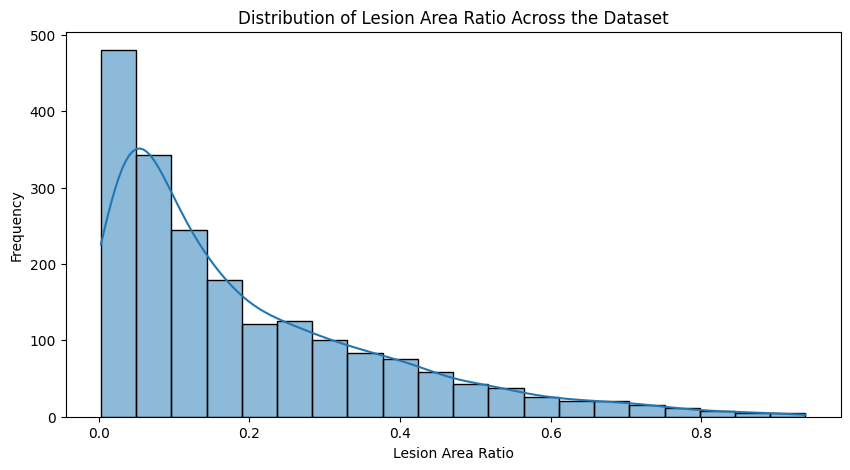

In [ ]:
def calculate_lesion_ratio(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    lesion_area = np.sum(mask > 0)
    total_area = mask.shape[0] * mask.shape[1]
    return lesion_area / total_area

ratios = [calculate_lesion_ratio(mask) for mask in mask_paths]

# Vẽ histogram của kích thước tổn thương
plt.figure(figsize=(10, 5))
sns.histplot(ratios, bins=20, kde=True)
plt.xlabel("Lesion Area Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Lesion Area Ratio Across the Dataset")
plt.show()

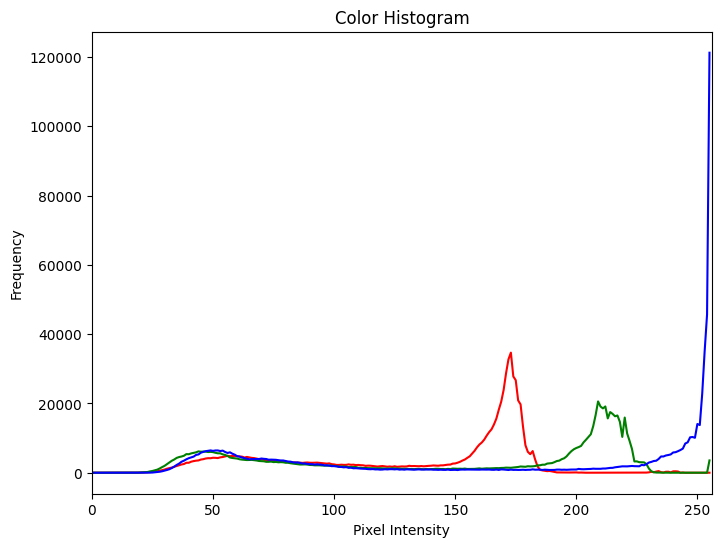

In [ ]:
def plot_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    colors = ('r', 'g', 'b')
    plt.figure(figsize=(8, 6))

    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(image_paths[0])

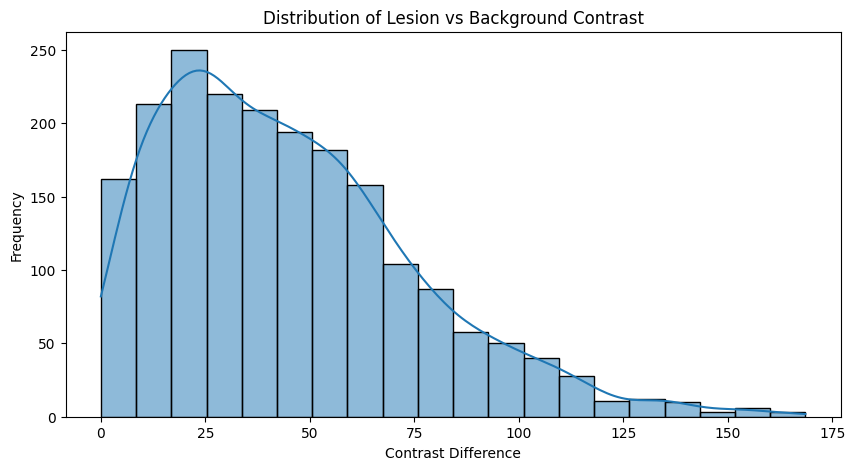

In [ ]:
def calculate_contrast(image_path, mask_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    lesion_pixels = img[mask > 0]
    background_pixels = img[mask == 0]

    return abs(np.mean(lesion_pixels) - np.mean(background_pixels))

contrasts = [calculate_contrast(img, mask) for img, mask in zip(image_paths, mask_paths)]

# Vẽ biểu đồ phân phối độ tương phản
plt.figure(figsize=(10, 5))
sns.histplot(contrasts, bins=20, kde=True)
plt.xlabel("Contrast Difference")
plt.ylabel("Frequency")
plt.title("Distribution of Lesion vs Background Contrast")
plt.show()

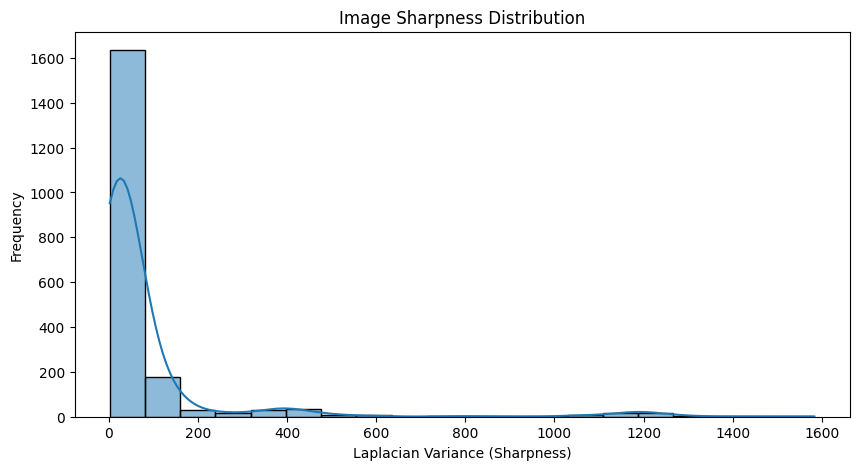

In [ ]:
def variance_of_laplacian(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return cv2.Laplacian(img, cv2.CV_64F).var()

blurriness = [variance_of_laplacian(img) for img in image_paths]

# Vẽ histogram độ sắc nét
plt.figure(figsize=(10, 5))
sns.histplot(blurriness, bins=20, kde=True)
plt.xlabel("Laplacian Variance (Sharpness)")
plt.ylabel("Frequency")
plt.title("Image Sharpness Distribution")
plt.show()